In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
#dimention reduction -SVD
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [3]:
doc=["you are watching machine learining course",
    "word frequency array is a part of unsoprsied from machine learning course",
    "faradars is an online educational website"]
titel=["first doc","second cod","third doc"]

In [4]:
tfid=TfidfVectorizer()
csr_mat=tfid.fit_transform(doc)
words=tfid.get_feature_names()
words

['an',
 'are',
 'array',
 'course',
 'educational',
 'faradars',
 'frequency',
 'from',
 'is',
 'learining',
 'learning',
 'machine',
 'of',
 'online',
 'part',
 'unsoprsied',
 'watching',
 'website',
 'word',
 'you']

In [5]:
csr_mat.toarray()

array([[0.        , 0.44036207, 0.        , 0.3349067 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44036207,
        0.        , 0.3349067 , 0.        , 0.        , 0.        ,
        0.        , 0.44036207, 0.        , 0.        , 0.44036207],
       [0.        , 0.        , 0.32049968, 0.24374827, 0.        ,
        0.        , 0.32049968, 0.32049968, 0.24374827, 0.        ,
        0.32049968, 0.24374827, 0.32049968, 0.        , 0.32049968,
        0.32049968, 0.        , 0.        , 0.32049968, 0.        ],
       [0.42339448, 0.        , 0.        , 0.        , 0.42339448,
        0.42339448, 0.        , 0.        , 0.32200242, 0.        ,
        0.        , 0.        , 0.        , 0.42339448, 0.        ,
        0.        , 0.        , 0.42339448, 0.        , 0.        ]])

In [6]:
svd=TruncatedSVD(n_components=2)
kmeans=KMeans(n_clusters=2)
pipline=make_pipeline(svd,kmeans)


pipline.fit(csr_mat)
lables=pipline.predict(csr_mat)

In [7]:
lables

array([1, 1, 0])

In [8]:
df=pd.DataFrame({"lables":lables,"docs":titel})
print(df.sort_values("lables"))

   lables        docs
2       0   third doc
0       1   first doc
1       1  second cod


In [9]:
#NMF
from sklearn.decomposition import NMF

In [37]:
%%capture
nmf=NMF(n_components=2)
nmf.fit(csr_mat)
nmf_trf=nmf.transform(csr_mat)

In [11]:
pd.DataFrame(nmf.components_,columns=sorted(tfid.vocabulary_))

,an,are,array,course,educational,faradars,frequency,from,is,learining,learning,machine,of,online,part,unsoprsied,watching,website,word,you
0,0.000000,0.318177,0.223181,0.412002,0.000000,0.000000,0.223181,0.223181,0.156948,0.318177,0.223181,0.412002,0.223181,0.000000,0.223181,0.223181,0.318177,0.000000,0.223181,0.318177
1,0.387415,0.000000,0.008670,0.000000,0.387415,0.387415,0.008670,0.008670,0.301695,0.000000,0.008670,0.000000,0.008670,0.387415,0.008670,0.008670,0.000000,0.387415,0.008670,0.000000


In [12]:
nmf_df=pd.DataFrame(nmf_trf,index=titel)
nmf_df

,0,1
first doc,0.716387,0.000000
second cod,0.691567,0.062128
third doc,0.000000,1.089327


In [13]:
#ex2
mat=[[1,2,3],
     [4,5,6],
     [7,8,12]]

In [38]:
%%capture
ex2_nmf=NMF(n_components=2)
ex2_nmf.fit(mat)
nmf_features=ex2_nmf.transform(mat)
print(nmf_features)
print()
print(nmf_features,ex2_nmf.components_)

In [15]:
np.dot(nmf_features,ex2_nmf.components_)

array([[ 1.30869092,  1.67597011,  3.04566601],
       [ 4.17765367,  4.81125267,  6.02788042],
       [ 6.83280677,  8.17763368, 11.97446747]])

In [16]:
data=pd.read_csv(r"C:\Users\Zohreh HP17\Desktop\Machin Learning\[FVML9606] Machine_Learning_Python\Files_and_codes\S09\led-digits.csv")

In [17]:
data

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data.shape

(99, 104)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Columns: 104 entries, 0.0 to 0.0.91
dtypes: float64(104)
memory usage: 80.6 KB


In [20]:
dat=np.array(data)

In [21]:
dat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
digit=dat[0,:]

In [23]:
bitmap=digit.reshape((13,8))
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

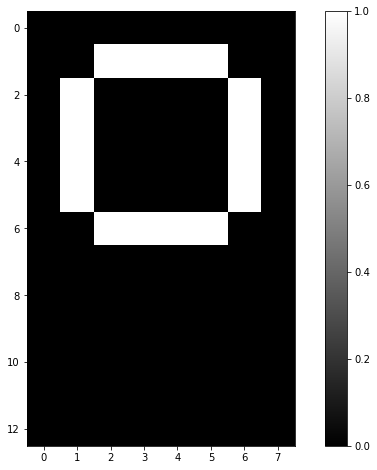

In [24]:
plt.figure(figsize=(11,8))
plt.imshow(bitmap,cmap="gray")
plt.colorbar()
plt.show()

In [39]:
%%capture
model=NMF(n_components=7)
features=model.fit_transform(dat)

In [42]:
features

array([[0.66368414, 0.06959178],
       [0.        , 1.12352327],
       [0.70431374, 0.        ]])

In [26]:
def show_as_image(s):
    d_ff=s.reshape((13,8))
    plt.figure(figsize=(10,7))
    plt.imshow(d_ff,cmap="gray")
    plt.colorbar()
    plt.show()

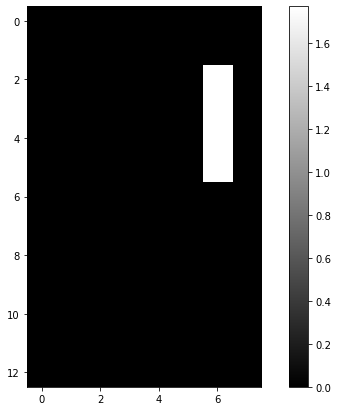

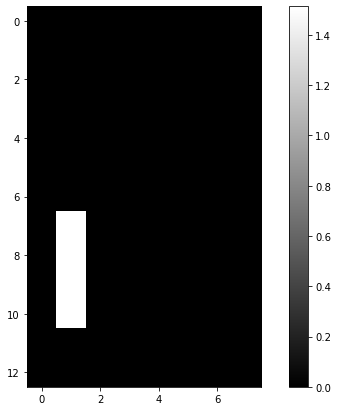

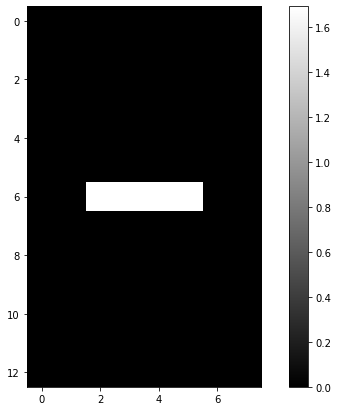

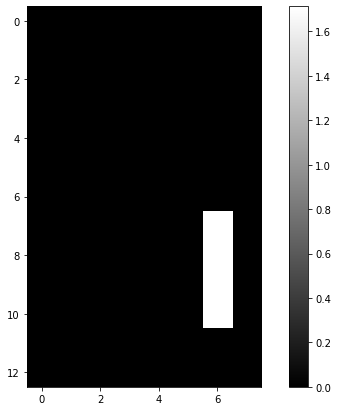

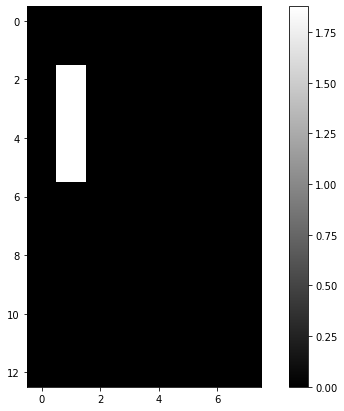

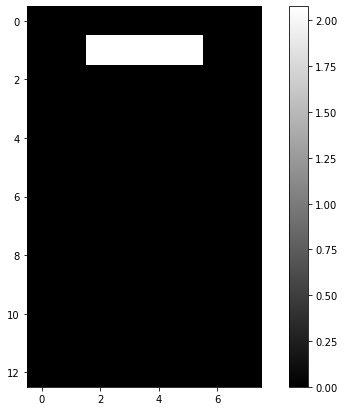

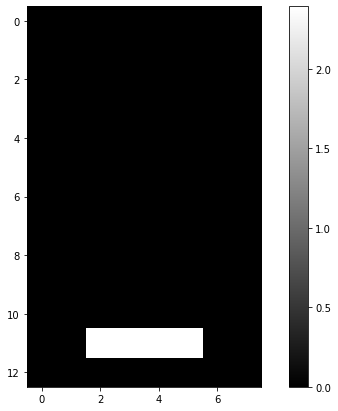

[None, None, None, None, None, None, None]

In [27]:
[show_as_image(components)for components in model.components_]

In [28]:
digit_features=features[0,:]

In [29]:
print(digit_features,"\n",model.components_)

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ] 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.77320445e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.77320445e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.77320445e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.77320445e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0

In [30]:
first_digt=np.dot(digit_features,model.components_)

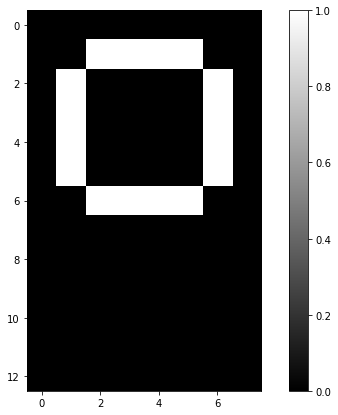

In [31]:
show_as_image(first_digt)

In [32]:
docs=["this video is about machine learning ",
      "this website is an educational website",
      "kmeans is a way to clustering that is a unsupervvised learning method",]
titels=["first doc","second doc","third doc"]

In [33]:
tfidf=TfidfVectorizer()
csr_mat=tfidf.fit_transform(docs)
words=tfidf.vocabulary_
csr_mat.toarray()



array([[0.4711101 , 0.        , 0.        , 0.        , 0.27824521,
        0.        , 0.35829137, 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.        , 0.        , 0.4711101 , 0.        ,
        0.        ],
       [0.        , 0.37994462, 0.        , 0.37994462, 0.22440141,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28895767, 0.        , 0.        , 0.        , 0.        ,
        0.75988923],
       [0.        , 0.        , 0.33382127, 0.        , 0.39432044,
        0.33382127, 0.25387968, 0.        , 0.33382127, 0.33382127,
        0.        , 0.33382127, 0.33382127, 0.        , 0.33382127,
        0.        ]])

In [40]:
%%capture
model=NMF(n_components=2)
model.fit(csr_mat)
features=model.fit_transform(csr_mat)



In [41]:
features

array([[0.66368414, 0.06959178],
       [0.        , 1.12352327],
       [0.70431374, 0.        ]])

In [35]:
from sklearn.preprocessing import normalize
norm_features=normalize(features)
norm_features_df=pd.DataFrame(norm_features,index=titels)
norm_features_df

,0,1
first doc,0.994547,0.104285
second doc,0.000000,1.000000
third doc,1.000000,0.000000


In [36]:
article=norm_features_df.loc["first doc"]
similarities=norm_features_df.dot(article)
similarities.nlargest()

first doc     1.000000
third doc     0.994547
second doc    0.104285
dtype: float64